In [10]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [11]:
from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import re
from sklearn.preprocessing import LabelEncoder

In [15]:
# Set up headless Chrome browser
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.5481.178 Safari/537.36")

driver = webdriver.Chrome(options=options)
url = "https://www.bbc.com/weather/293397"
driver.get(url)
driver.implicitly_wait(5)
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

# Find all daily forecast blocks
forecasts = soup.find_all("li", class_="wr-day")
weather_data = []

for forecast in forecasts:
    # Get the date text
    date_tag = forecast.find("div", class_="wr-day__title")
    raw_date = date_tag.text.strip() if date_tag else "N/A"
    match = re.search(r'(\d{1,2})(?:st|nd|rd|th)?\s+([A-Za-z]+)', raw_date)
    wd_match = re.search(r'(Mon|Tue|Wed|Thu|Fri|Sat|Sun)', raw_date)

    # Format date as "Mon 14.07"
    if match and wd_match:
        day = match.group(1).zfill(2)
        weekday = wd_match.group(1)
        month = datetime.now().month
        date = f"{weekday} {day}.{month:02d}"
    else:
        date = raw_date

    # Get max temperature
    temp_max_tag = forecast.find("span", class_="wr-day-temperature__high-value")
    temp_max = temp_max_tag.text.strip().replace("°", "") if temp_max_tag else "N/A"
    temp_max = temp_max.split()[0] if temp_max != "N/A" else "N/A"

    # Get min temperature
    temp_min_tag = forecast.find("span", class_="wr-day-temperature__low-value")
    temp_min = temp_min_tag.text.strip().replace("°", "") if temp_min_tag else "N/A"
    temp_min = temp_min.split()[0] if temp_min != "N/A" else "N/A"

    # Get weather condition
    condition_tag = forecast.find("span", class_="wr-day__weather-type-description")
    if not condition_tag:
        condition_tag = forecast.find("div", class_="wr-day__details__weather-type-description")
    weather_condition = condition_tag.text.strip() if condition_tag else "N/A"

    # Add data to the list
    weather_data.append({
        "Date": date,
        "Min Temperature (°C)": temp_min,
        "Max Temperature (°C)": temp_max,
        "Weather Condition": weather_condition
    })

In [16]:
# This cell was merged with the previous cell to fix an IndentationError.

In [17]:
# Print table
import pandas as pd
df = pd.DataFrame(weather_data)
df

,Date,Min Temperature (°C),Max Temperature (°C),Weather Condition
0,Today,21,29,Sunny and a gentle breeze
1,Tue 15.07,21,30,Sunny and a gentle breeze
2,Wed 16.07,22,31,Sunny and a gentle breeze
3,Thu 17.07,23,32,Sunny and a gentle breeze
4,Fri 18.07,22,31,Sunny and a gentle breeze
5,Sat 19.07,23,30,Sunny and a gentle breeze
6,Sun 20.07,23,31,Sunny and a gentle breeze
7,Mon 21.07,23,31,Sunny and a gentle breeze
8,Tue 22.07,23,31,Sunny and a gentle breeze
9,Wed 23.07,23,31,Sunny and a gentle breeze


In [18]:
# Missing values
df.isnull().sum()

,0
Date,0
Min Temperature (°C),0
Max Temperature (°C),0
Weather Condition,0


In [19]:
df.describe()

,Date,Min Temperature (°C),Max Temperature (°C),Weather Condition
count,14,14,14,14
unique,14,3,4,1
top,Today,23,31,Sunny and a gentle breeze
freq,1,8,10,14


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  14 non-null     object
 1   Min Temperature (°C)  14 non-null     object
 2   Max Temperature (°C)  14 non-null     object
 3   Weather Condition     14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [21]:
# Converting Temperature object into int
df['Max Temperature (°C)'] = df['Max Temperature (°C)'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  14 non-null     object
 1   Min Temperature (°C)  14 non-null     object
 2   Max Temperature (°C)  14 non-null     int64 
 3   Weather Condition     14 non-null     object
dtypes: int64(1), object(3)
memory usage: 580.0+ bytes


In [22]:
# Encoding Weather Condition into categorical values
label_encoder = LabelEncoder()

df["Weather Encoded"] = label_encoder.fit_transform(df["Weather Condition"])

In [23]:
df

,Date,Min Temperature (°C),Max Temperature (°C),Weather Condition,Weather Encoded
0,Today,21,29,Sunny and a gentle breeze,0
1,Tue 15.07,21,30,Sunny and a gentle breeze,0
2,Wed 16.07,22,31,Sunny and a gentle breeze,0
3,Thu 17.07,23,32,Sunny and a gentle breeze,0
4,Fri 18.07,22,31,Sunny and a gentle breeze,0
5,Sat 19.07,23,30,Sunny and a gentle breeze,0
6,Sun 20.07,23,31,Sunny and a gentle breeze,0
7,Mon 21.07,23,31,Sunny and a gentle breeze,0
8,Tue 22.07,23,31,Sunny and a gentle breeze,0
9,Wed 23.07,23,31,Sunny and a gentle breeze,0


In [24]:
# Average Temperature
average_temp = df["Max Temperature (°C)"].mean()
print(f"Average Temperature on the 2 next weeks: {average_temp:.2f}°C")

Average Temperature on the 2 next weeks: 30.79°C


In [25]:
# Trends
most_common_condition = df["Weather Condition"].value_counts().idxmax()
print(f"The most common weather condition will be: {most_common_condition}")

The most common weather condition will be: Sunny and a gentle breeze


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

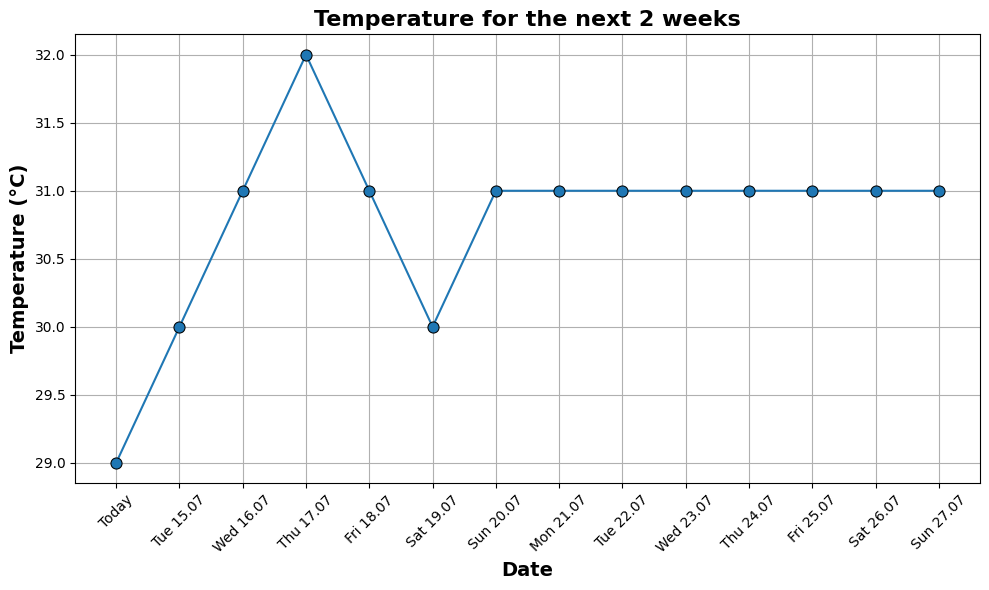

In [31]:
# Temperature over time
plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x="Date", y="Max Temperature (°C)", marker='o', markeredgecolor='black', markersize=8)
plt.title("Temperature for the next 2 weeks", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Temperature (°C)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

plt.show()

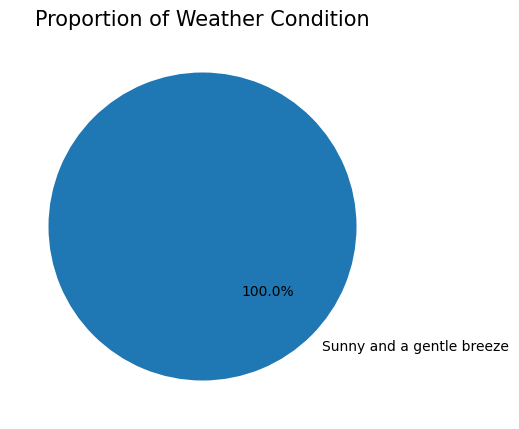

In [35]:
# Calculate the value counts of the 'Weather Condition' column
condition_counts = df["Weather Condition"].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(
    condition_counts,
    labels=condition_counts.index,
    autopct="%1.1f%%",
    startangle=135
)
plt.title("Proportion of Weather Condition", fontsize=15)
plt.show()

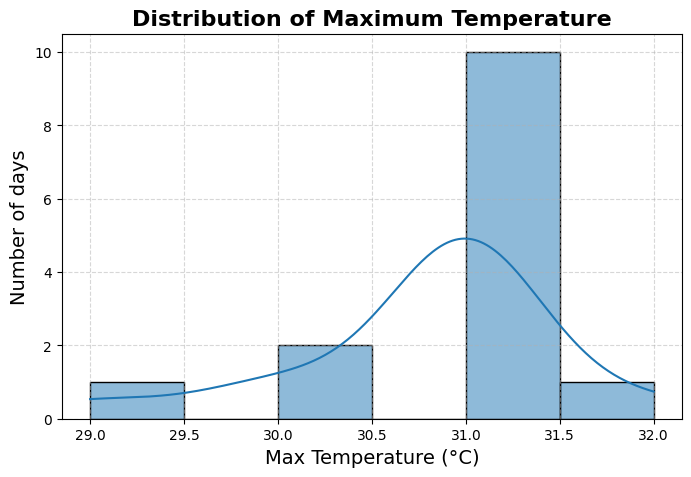

In [36]:
# Histogramme
plt.figure(figsize=(8, 5))
sns.histplot(df["Max Temperature (°C)"], bins=6, kde=True)

plt.title("Distribution of Maximum Temperature", fontsize=16, fontweight="bold")
plt.xlabel("Max Temperature (°C)", fontsize=14)
plt.ylabel("Number of days", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()